In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

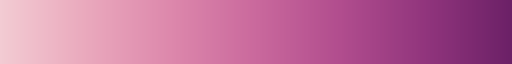

In [21]:
from palettable.cartocolors.sequential import Magenta_7, PurpOr_7, BluYl_7
from palettable.scientific.sequential import Bamako_14_r, Davos_14_r, Tokyo_14_r, Acton_14_r, Devon_14_r, LaPaz_14_r, Imola_14_r, LaJolla_14, Nuuk_14_r, Oslo_14_r
from palettable.cmocean.sequential import Deep_13, Matter_14, Haline_14_r,Ice_14_r, Tempo_14
from palettable.lightbartlein.sequential import Blues10_8, Blues7_7

Magenta_7.mpl_colormap

In [46]:
cmap_dict = {    #cartocolors
            "Magenta_7": ["Cartocolors Magenta_7", Magenta_7.mpl_colormap],
            "PurpOr_7" : ["Cartocolors PurpOr_7",  PurpOr_7.mpl_colormap],
             "BluYl_7" : ["Cartocolors BluYl_7", BluYl_7.mpl_colormap],
             
                #scientific
             "Bamako_14": ["Scientific Bamako_14", Bamako_14_r.mpl_colormap],
            "Davos_14": ["Scientific Davos_14",   Davos_14_r.mpl_colormap],
            "Tokyo_14": ["Scientific Tokyo_14", Tokyo_14_r.mpl_colormap],
            "Acton_14": ["Scientific Acton_14",  Acton_14_r.mpl_colormap],
            "Imola_14": ["Scientific Imola_14", Imola_14_r.mpl_colormap],
            "LaJolla_14": ["Scientific  LaJolla_14",  LaJolla_14.mpl_colormap],
            "Nuuk_14": ["Scientific Nuuk_14",  Nuuk_14_r.mpl_colormap],
            "Oslo_14": ["Scientific Oslo_14",  Oslo_14_r.mpl_colormap],
            "LaPaz_14":  ["Scientific LaPaz_14", LaPaz_14_r.mpl_colormap],
            "Devon_14": ["Scientific Devon_14", Devon_14_r.mpl_colormap],
    
                #Cmocean
            "Deep_13": [ "Cmocean Deep_13", Deep_13.mpl_colormap],
            "Matter_14": ["Cmocean Matter_14", Matter_14.mpl_colormap],
            "Ice_14": ["Cmocean Ice_14",Haline_14_r.mpl_colormap],
            'Haline_14': ['Cmocean Haline_14',Ice_14_r.mpl_colormap],
            'Tempo_14': [ 'Cmocean Tempo_14' ,Tempo_14.mpl_colormap],
    
                #Inbuilt
            "YlGnBu" : ["Colorbrewer YlGnBu","YlGnBu"],
            "cividis": ["Colorbrewer Cividis",  "cividis"],
            "cividis_r": ["Colorbrewer Cividis",  "cividis_r"],
                'Blues': ["Colorbrewer Blues",'Blues'],
    
                #Lightbartlein
            'Blues10_8': ['LightBartlein Blues10_8',Blues10_8.mpl_colormap], 
            "Blues7_7": ["LightBartlein Blues7_7", Blues7_7.mpl_colormap]
}

In [5]:
#load data
df = pd.read_csv("US_births_1994-2014.csv")

data = df.groupby(["date_of_month", "month"])["births"].mean().unstack()
data.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
date_of_month,,,,,,,,,,,,
1,7826.761905,10969.714286,11166.428571,10335.333333,11046.142857,11197.952381,11897.476190,11824.380952,10962.666667,11771.238095,11400.904762,11293.333333
2,9356.238095,10999.238095,10840.952381,11049.380952,11160.190476,11384.952381,11874.761905,11628.619048,11042.238095,11631.952381,11128.095238,11237.619048
3,10869.476190,10877.761905,11114.523810,10943.952381,10944.380952,11290.047619,11352.285714,11367.333333,11163.047619,11726.809524,11168.714286,11194.142857
4,11064.476190,10943.571429,11026.666667,11263.619048,10746.380952,11261.666667,8824.523810,11604.571429,11266.761905,11531.666667,11172.380952,11037.761905
5,10991.714286,10727.428571,11018.476190,10934.571429,11108.095238,11207.142857,10442.095238,11649.809524,11488.761905,11312.333333,11238.761905,11189.809524


## Resources

Matplotlib: https://matplotlib.org/stable/tutorials/colors/colormaps.html

Palettable: https://jiffyclub.github.io/palettable/

In [4]:
def format_plot():
    plt.gca().set_xticklabels(month_labels, rotation = 0, fontsize = 10.5, va='bottom')
    plt.gca().xaxis.tick_top()
    plt.gca().tick_params(axis='both', length = 0)
    plt.gca().set_ylabel("")
    plt.gca().set_xlabel("")

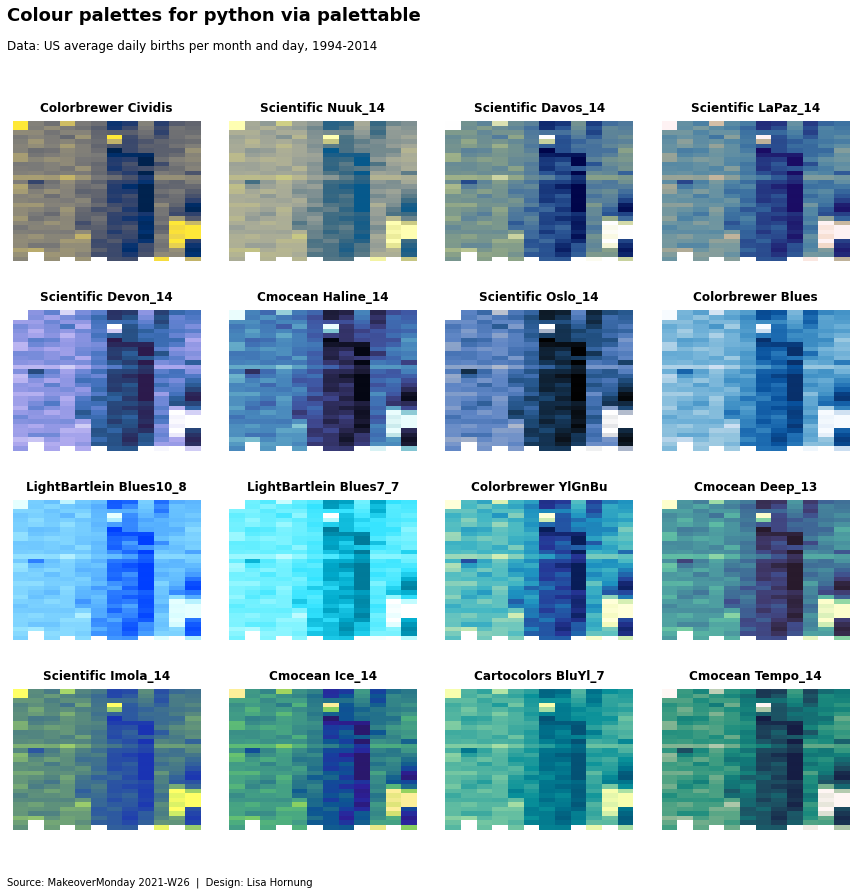

In [47]:
cmaps = ["cividis_r", "Nuuk_14", "Davos_14", "LaPaz_14",
        "Devon_14", "Haline_14", "Oslo_14", "Blues", 
         "Blues10_8","Blues7_7", "YlGnBu",
          "Deep_13","Imola_14", "Ice_14","BluYl_7",
         "Tempo_14" ]

#Create plot
fig, ax = plt.subplots(figsize=(15,20))
fig.subplots_adjust(wspace = 0.15, hspace = 0.35)
fig.set_facecolor("#FFFFFF")

pos = 0

for cmap in cmaps:
    pos +=1
     
    #plot
    plt.subplot(6,4,pos)
    sns.heatmap(data, cmap=cmap_dict[cmap][1], robust=True, cbar=False)  
    plt.gca().axis('off')
    plt.title(cmap_dict[cmap][0], fontsize = 12, fontweight='bold', y=1.03)

#set main title
fig.text(0.12,0.95, "Colour palettes for python via palettable",fontweight = "bold", fontsize=18  )
fig.text(0.12,0.93, "Data: US average daily births per month and day, 1994-2014",fontweight = "regular", fontsize=12  )
fig.text(0.12,0.35, "Source: MakeoverMonday 2021-W26  |  Design: Lisa Hornung ",fontweight = "regular", fontsize=10  )

#save
plt.savefig("MakeoverMonday2021W26_heatmap_blues.png", bbox_inches="tight",pad_inches=0.2, transparent=False)

plt.show()

### Yellow and blue

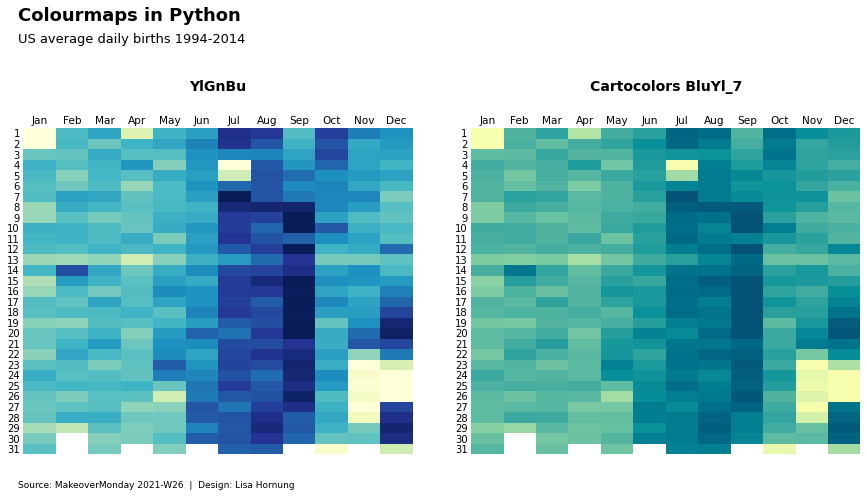

In [5]:
cmaps = ["YlGnBu", "Cartocolors BluYl_7"]
month_labels =  [ 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

## plot
fig, ax = plt.subplots(figsize=(15,6))
fig.subplots_adjust(wspace = 0.15)
fig.set_facecolor("#FFFFFF")

#second plot
plt.subplot(1,2,1)
sns.heatmap(data, cmap=cmaps[0], robust=True, cbar=False)
format_plot()
plt.title(cmaps[0], y=1.1, fontweight = "bold", fontsize=14)


#second plot
plt.subplot(1,2,2)
sns.heatmap(data, cmap=BluYl_7.mpl_colormap, robust=True, cbar=False)
format_plot()
plt.title(cmaps[1], y=1.1, fontweight = "bold", fontsize=14)


#set main title
fig.text(0.12,1.13, "Colourmaps in Python",fontweight = "bold", fontsize=18  )
fig.text(0.12,1.08, "US average daily births 1994-2014",fontweight = "regular", fontsize=13  )
fig.text(0.12,0.05, "Source: MakeoverMonday 2021-W26  |  Design: Lisa Hornung ",fontweight = "regular", fontsize=9  )

#save
plt.savefig("MakeoverMonday2021W26_heatmap_YlBlu.png", bbox_inches="tight",pad_inches=0.2, transparent=False)

plt.show()

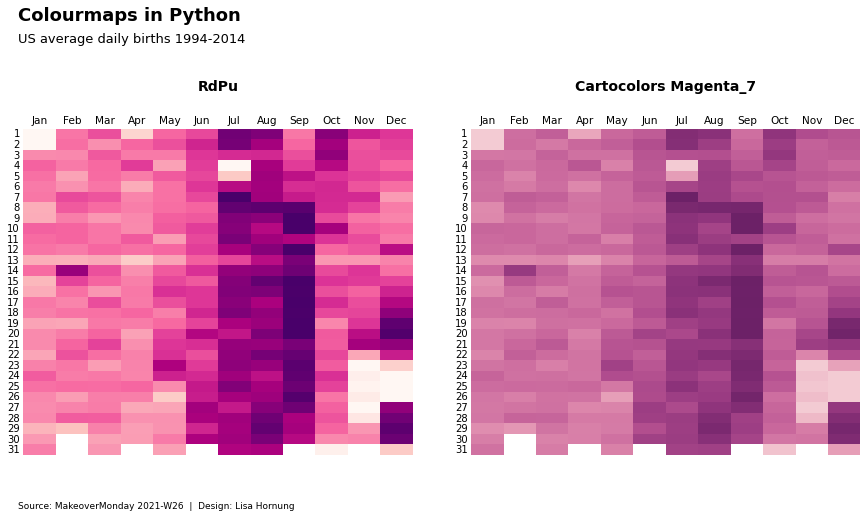

In [94]:

cmaps = ["RdPu", "Cartocolors Magenta_7"] 
month_labels =  [ 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

## plot
fig, ax = plt.subplots(figsize=(15,6))
fig.subplots_adjust(wspace = 0.15)

#second plot
plt.subplot(1,2,1)
sns.heatmap(data, cmap=cmaps[0], robust=True, cbar=False)
format_plot()
plt.title(cmaps[0], y=1.1, fontweight = "bold", fontsize=14)


#second plot
plt.subplot(1,2,2)
sns.heatmap(data, cmap=Magenta_7.mpl_colormap, robust=True, cbar=False)
format_plot()
plt.title(cmaps[1], y=1.1, fontweight = "bold", fontsize=14)


#set main title
fig.text(0.12,1.13, "Colourmaps in Python",fontweight = "bold", fontsize=18  )
fig.text(0.12,1.08, "US average daily births 1994-2014",fontweight = "regular", fontsize=13  )
fig.text(0.12,0, "Source: MakeoverMonday 2021-W26  |  Design: Lisa Hornung ",fontweight = "regular", fontsize=9  )



plt.show()

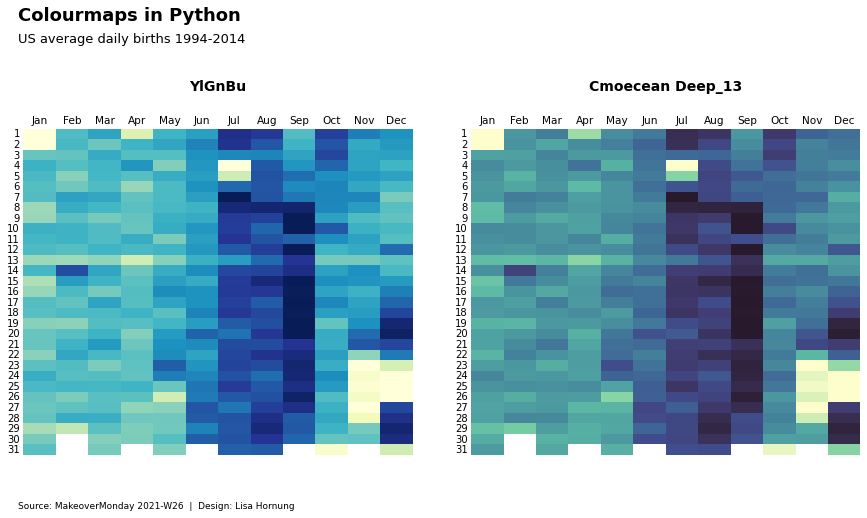

In [99]:

cmaps = ["YlGnBu", "Cmoecean Deep_13"] 
month_labels =  [ 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

## plot
fig, ax = plt.subplots(figsize=(15,6))
fig.subplots_adjust(wspace = 0.15)

#second plot
plt.subplot(1,2,1)
sns.heatmap(data, cmap=cmaps[0], robust=True, cbar=False)
format_plot()
plt.title(cmaps[0], y=1.1, fontweight = "bold", fontsize=14)


#second plot
plt.subplot(1,2,2)
sns.heatmap(data, cmap=Deep_13.mpl_colormap, robust=True, cbar=False)
format_plot()
plt.title(cmaps[1], y=1.1, fontweight = "bold", fontsize=14)


#set main title
fig.text(0.12,1.13, "Colourmaps in Python",fontweight = "bold", fontsize=18  )
fig.text(0.12,1.08, "US average daily births 1994-2014",fontweight = "regular", fontsize=13  )
fig.text(0.12,0, "Source: MakeoverMonday 2021-W26  |  Design: Lisa Hornung ",fontweight = "regular", fontsize=9  )



plt.show()

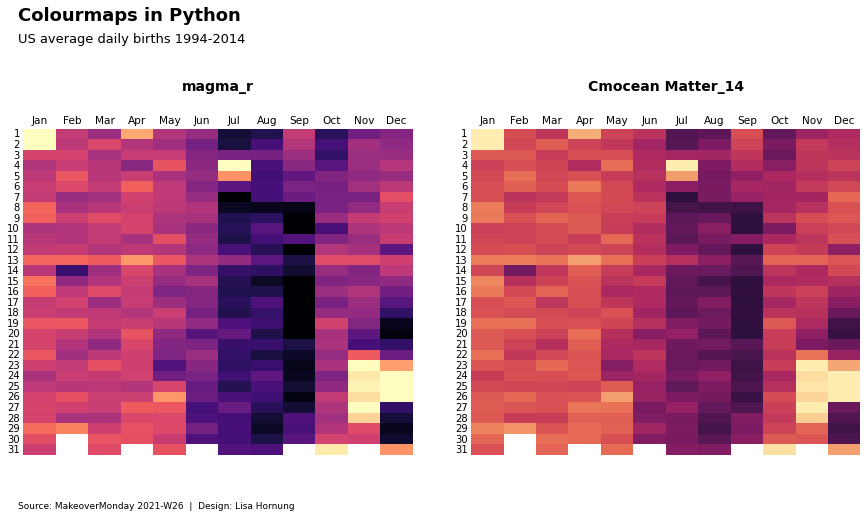

In [104]:

cmaps = ["magma_r", "Cmocean Matter_14"] 
month_labels =  [ 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

## plot
fig, ax = plt.subplots(figsize=(15,6))
fig.subplots_adjust(wspace = 0.15)

#second plot
plt.subplot(1,2,1)
sns.heatmap(data, cmap=cmaps[0], robust=True, cbar=False)
format_plot()
plt.title(cmaps[0], y=1.1, fontweight = "bold", fontsize=14)


#second plot
plt.subplot(1,2,2)
sns.heatmap(data, cmap=Matter_14.mpl_colormap, robust=True, cbar=False)
format_plot()
plt.title(cmaps[1], y=1.1, fontweight = "bold", fontsize=14)


#set main title
fig.text(0.12,1.13, "Colourmaps in Python",fontweight = "bold", fontsize=18  )
fig.text(0.12,1.08, "US average daily births 1994-2014",fontweight = "regular", fontsize=13  )
fig.text(0.12,0, "Source: MakeoverMonday 2021-W26  |  Design: Lisa Hornung ",fontweight = "regular", fontsize=9  )

plt.show()

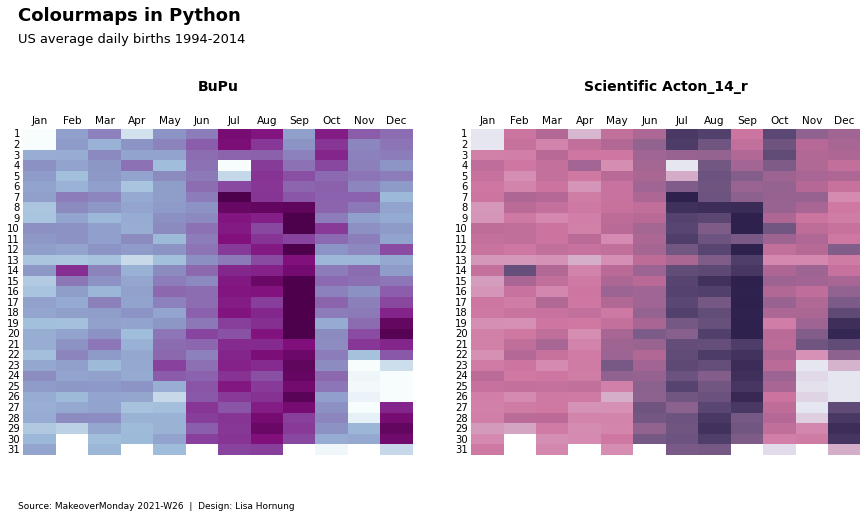

In [113]:

cmaps = ["BuPu", "Scientific Acton_14_r"] 
month_labels =  [ 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

## plot
fig, ax = plt.subplots(figsize=(15,6))
fig.subplots_adjust(wspace = 0.15)

#second plot
plt.subplot(1,2,1)
sns.heatmap(data, cmap=cmaps[0], robust=True, cbar=False)
format_plot()
plt.title(cmaps[0], y=1.1, fontweight = "bold", fontsize=14)


#second plot
plt.subplot(1,2,2)
sns.heatmap(data, cmap=Acton_14_r.mpl_colormap, robust=True, cbar=False)
format_plot()
plt.title(cmaps[1], y=1.1, fontweight = "bold", fontsize=14)


#set main title
fig.text(0.12,1.13, "Colourmaps in Python",fontweight = "bold", fontsize=18  )
fig.text(0.12,1.08, "US average daily births 1994-2014",fontweight = "regular", fontsize=13  )
fig.text(0.12,0, "Source: MakeoverMonday 2021-W26  |  Design: Lisa Hornung ",fontweight = "regular", fontsize=9  )

plt.show()

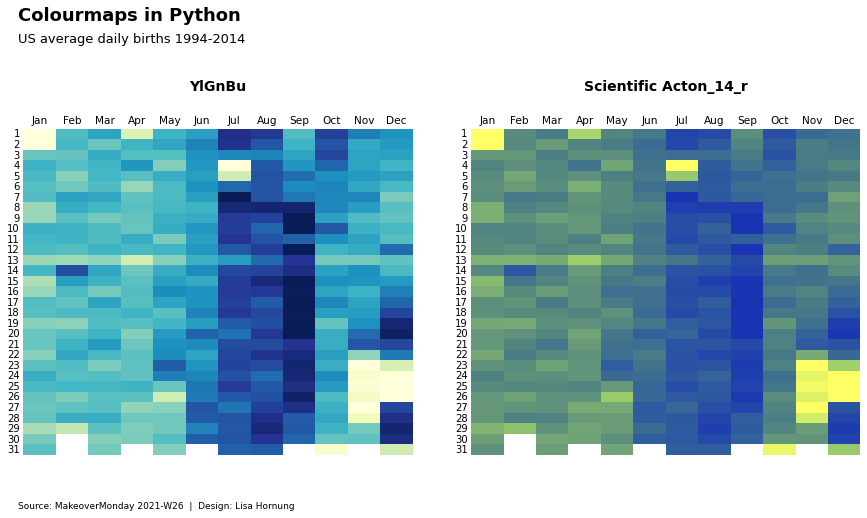

In [115]:

cmaps = ["YlGnBu", "Scientific Acton_14_r"] 
month_labels =  [ 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

## plot
fig, ax = plt.subplots(figsize=(15,6))
fig.subplots_adjust(wspace = 0.15)

#second plot
plt.subplot(1,2,1)
sns.heatmap(data, cmap=cmaps[0], robust=True, cbar=False)
format_plot()
plt.title(cmaps[0], y=1.1, fontweight = "bold", fontsize=14)


#second plot
plt.subplot(1,2,2)
sns.heatmap(data, cmap=Imola_14_r.mpl_colormap, robust=True, cbar=False)
format_plot()
plt.title(cmaps[1], y=1.1, fontweight = "bold", fontsize=14)


#set main title
fig.text(0.12,1.13, "Colourmaps in Python",fontweight = "bold", fontsize=18  )
fig.text(0.12,1.08, "US average daily births 1994-2014",fontweight = "regular", fontsize=13  )
fig.text(0.12,0, "Source: MakeoverMonday 2021-W26  |  Design: Lisa Hornung ",fontweight = "regular", fontsize=9  )

plt.show()

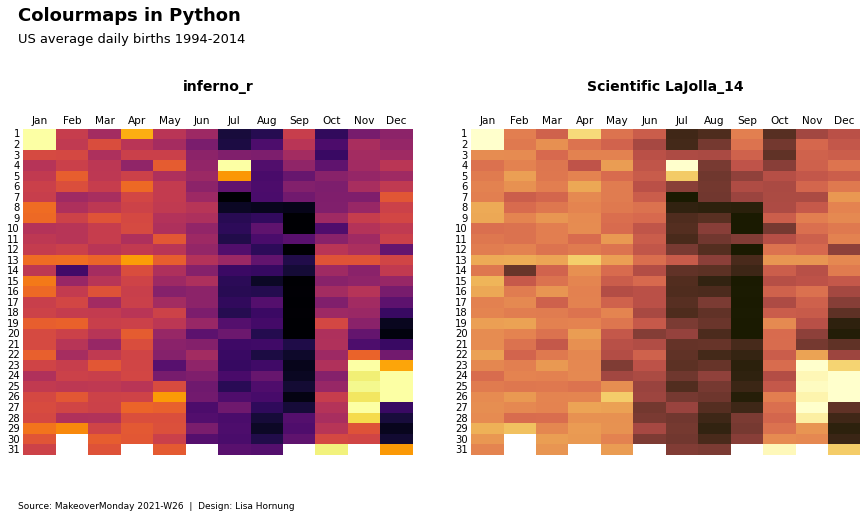

In [122]:
cmaps = ["inferno_r", "Scientific LaJolla_14"] 
month_labels =  [ 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

## plot
fig, ax = plt.subplots(figsize=(15,6))
fig.subplots_adjust(wspace = 0.15)

#second plot
plt.subplot(1,2,1)
sns.heatmap(data, cmap=cmaps[0], robust=True, cbar=False)
format_plot()
plt.title(cmaps[0], y=1.1, fontweight = "bold", fontsize=14)


#second plot
plt.subplot(1,2,2)
sns.heatmap(data, cmap=LaJolla_14.mpl_colormap, robust=True, cbar=False)
format_plot()
plt.title(cmaps[1], y=1.1, fontweight = "bold", fontsize=14)


#set main title
fig.text(0.12,1.13, "Colourmaps in Python",fontweight = "bold", fontsize=18  )
fig.text(0.12,1.08, "US average daily births 1994-2014",fontweight = "regular", fontsize=13  )
fig.text(0.12,0, "Source: MakeoverMonday 2021-W26  |  Design: Lisa Hornung ",fontweight = "regular", fontsize=9  )

plt.show()

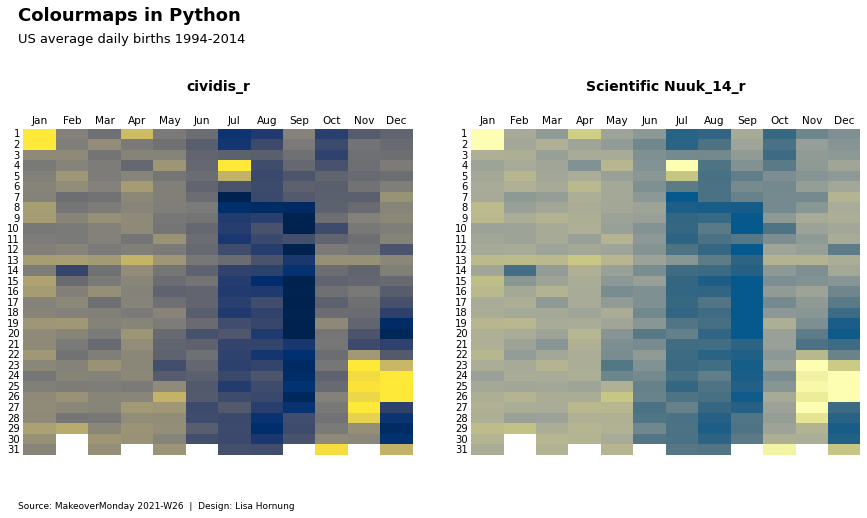

In [132]:

cmaps = ["cividis_r", "Scientific Nuuk_14_r"] 
month_labels =  [ 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

## plot
fig, ax = plt.subplots(figsize=(15,6))
fig.subplots_adjust(wspace = 0.15)

#second plot
plt.subplot(1,2,1)
sns.heatmap(data, cmap=cmaps[0], robust=True, cbar=False)
format_plot()
plt.title(cmaps[0], y=1.1, fontweight = "bold", fontsize=14)


#second plot
plt.subplot(1,2,2)
sns.heatmap(data, cmap=Nuuk_14_r.mpl_colormap, robust=True, cbar=False)
format_plot()
plt.title(cmaps[1], y=1.1, fontweight = "bold", fontsize=14)


#set main title
fig.text(0.12,1.13, "Colourmaps in Python",fontweight = "bold", fontsize=18  )
fig.text(0.12,1.08, "US average daily births 1994-2014",fontweight = "regular", fontsize=13  )
fig.text(0.12,0, "Source: MakeoverMonday 2021-W26  |  Design: Lisa Hornung ",fontweight = "regular", fontsize=9  )

plt.show()

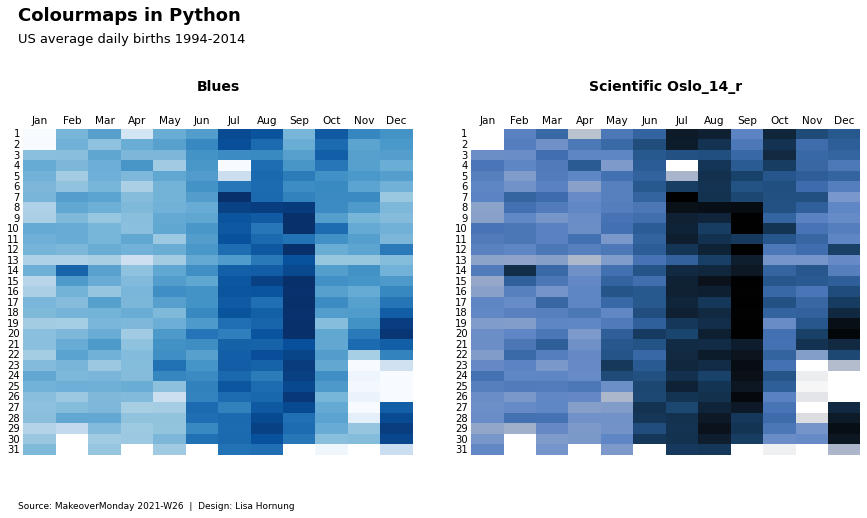

In [130]:

cmaps = ["Blues", "Scientific Oslo_14_r"] 
month_labels =  [ 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

## plot
fig, ax = plt.subplots(figsize=(15,6))
fig.subplots_adjust(wspace = 0.15)

#second plot
plt.subplot(1,2,1)
sns.heatmap(data, cmap=cmaps[0], robust=True, cbar=False)
format_plot()
plt.title(cmaps[0], y=1.1, fontweight = "bold", fontsize=14)


#second plot
plt.subplot(1,2,2)
sns.heatmap(data, cmap=Oslo_14_r.mpl_colormap, robust=True, cbar=False)
format_plot()
plt.title(cmaps[1], y=1.1, fontweight = "bold", fontsize=14)


#set main title
fig.text(0.12,1.13, "Colourmaps in Python",fontweight = "bold", fontsize=18  )
fig.text(0.12,1.08, "US average daily births 1994-2014",fontweight = "regular", fontsize=13  )
fig.text(0.12,0, "Source: MakeoverMonday 2021-W26  |  Design: Lisa Hornung ",fontweight = "regular", fontsize=9  )

plt.show()